# Play Tic-Tac-Toe Interactively (Simple Implementation)

To play interactively, you need to run the whole notebook in JupyterLab and scroll down.

The code for the basic functions used for search are implemented in [tictactoe.py](tictactoe.py).

In [ ]:
# download if missing
import urllib.request
import os

if not os.path.exists("tictactoe.py"):
    urllib.request.urlretrieve("https://raw.githubusercontent.com/mhahsler/CS7320-AI/refs/heads/master/Games/tictactoe.py", "tictactoe.py")

In [1]:
from tictactoe import empty_board, actions, result, terminal, utility, other, show_board
from tictactoe import random_player, play 

## Implement an Interactive Game


### Interactive Player

Implement the interactive player. It shows the board and asks you for the move.

In [5]:
from IPython.display import clear_output

def interactive_player(board, player = None):
    clear_output(wait = False)
    show_board(board, help = True)
    
    available = actions(board)
    print(f'Available actions are: {available}')

    retry = True
    while retry:
        try:
            move = int(input("Your move (0-8 or -1 to end the game):\n"))            
        
            if move in available:
                retry = False
            else:
                raise ValueError()
        except ValueError:
            if move == -1:
                print("Game ended by user.")
                raise Exception("Game ended by user.")
            
            print("Please enter a valid move.")
            

    return(move)

## Start an interactive game as x

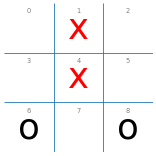

Available actions are: [0, 2, 3, 5, 7]


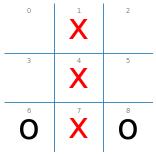

{'x': 1, 'o': 0, 'd': 0}

In [8]:
play(interactive_player, random_player, N = 1,  show_final_board=True)

### Start an interactive game as o

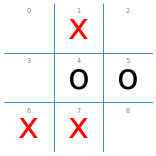

Available actions are: [0, 2, 3, 8]


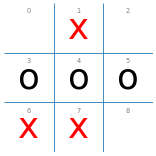

{'x': 0, 'o': 1, 'd': 0}

In [7]:
play(random_player, interactive_player, N = 1, show_final_board = True)